In [ ]:
import cv2,os

data_path='/content/dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'with mask': 0, '.ipynb_checkpoints': 1, 'without mask': 2}
['with mask', '.ipynb_checkpoints', 'without mask']
[0, 1, 2]


In [ ]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)

    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [ ]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from tensorflow import keras # Import keras from tensorflow if not already done
# Instead of using np_utils, import to_categorical directly
from keras.utils import to_categorical

new_target=to_categorical(target)
np.save('data',data)
np.save('target',new_target)

In [ ]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(3,activation='softmax')) # Changed the output layer to 3 neurons
#The Final layer with three outputs for three categories


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)
# Changed the filepath to end with .keras
checkpoint = ModelCheckpoint('model-{epoch:03d}.keras',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 112s 4s/step - accuracy: 0.5314 - loss: 0.9268 - val_accuracy: 0.5403 - val_loss: 0.6556
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 108s 3s/step - accuracy: 0.6283 - loss: 0.6150 - val_accuracy: 0.8065 - val_loss: 0.4338
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 94s 3s/step - accuracy: 0.8134 - loss: 0.4160 - val_accuracy: 0.8871 - val_loss: 0.2869
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - accuracy: 0.8670 - loss: 0.3139 - val_accuracy: 0.8266 - val_loss: 0.3944
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - accuracy: 0.9067 - loss: 0.2339 - val_accuracy: 0.9113 - val_loss: 0.2188
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step - accuracy: 0.9330 - loss: 0.1584 - val_accuracy: 0.9032 - val_loss: 0.2096
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.9645 - loss: 0.1348 - val_accuracy: 0.9637 - val_loss: 0.1091
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.9750 - loss: 0.0811 - val_accuracy: 0.9435 - val

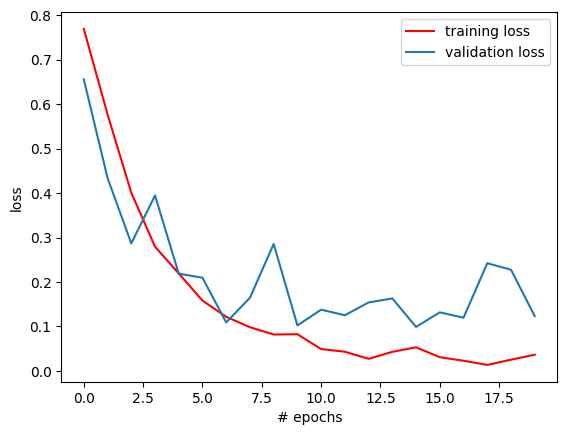

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

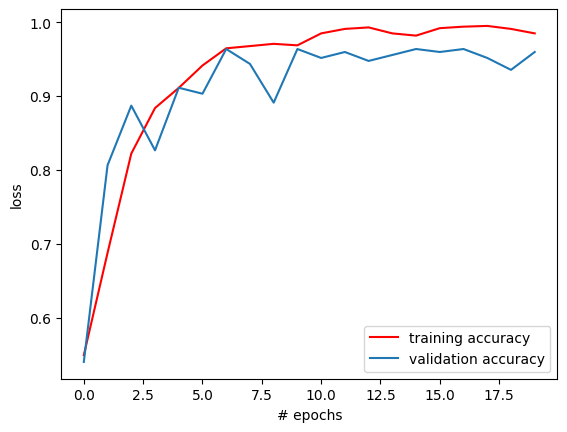

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
print(model.evaluate(test_data,test_target))

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 607ms/step - accuracy: 0.9297 - loss: 0.3411
[0.22381052374839783, 0.9492753744125366]
